# Introduction

The 30-Day Police Blotter contains the most recent initial crime incident data, updated on a nightly basis. All data is reported at the block/intersection level, with the exception of sex crimes, which are reported at the police zone level. 
This dataset only contains information reported by City of Pittsburgh Police, and does not contain incidents that solely involve other police departments operating within the city (campus police, Port Authority, etc.)

The data set is Public WiFi Locations https://data.wprdc.org/dataset/police-incident-blotter


## Examine Data from 30-day Police Report 

In [17]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
%matplotlib inline

#Open Police Blotter data 
police_blotter = pd.read_csv("police_data.csv", sep=",") 
police_blotter

<ipython-input-17-5aa501704083>:7: DtypeWarning: Columns (3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  police_blotter = pd.read_csv("police_data.csv", sep=",")


,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,Num
0,2.768477e+08,22047618.0,6.0,2022-03-31T08:42:00,"1900 Block Murray Ave Pittsburgh, PA 15217",N,Squirrel Hill South,4,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,1408.0,5.0,3.0,-79.923068,40.435880,1
1,2.768571e+08,22047668.0,0.0,2022-03-30T09:45:00,"2200 Block Shady Ave Pittsburgh, PA 15217",N,Squirrel Hill South,4,99,2709.1 Stalking Conduct or Repeatedly Acts Inc...,1408.0,5.0,3.0,-79.918778,40.433377,1
2,2.773046e+08,22050629.0,6.0,2022-04-05T10:10:00,"1100 Block Round Top St Pittsburgh, PA 15205",N,Crafton Heights,6,THEFT FROM AUTO,3934 Theft from Vehicle / 3304(a)(5) CRIMINAL ...,2815.0,NaN,NaN,NaN,NaN,1
3,-3.413184e+09,22043806.0,27.0,2022-03-24T14:51:00,"S 23rd St & Sidney St Pittsburgh, PA 15203",Y,South Side Flats,3,HIT AND RUN,3743 Accidents Involving Damage to Attended Ve...,1609.0,3.0,3.0,-79.972945,40.429246,1
4,2.762184e+08,22043851.0,18.0,2022-03-24T15:17:00,"Bingham St & S 6th St Pittsburgh, PA 15203",Y,South Side Flats,3,STOLEN PROPERTY,13(a)(32) Paraphernalia - Use or Possession,1702.0,3.0,3.0,-79.993635,40.429359,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Upon further inspection it was clear that some of the data was taken from outside cities as well. This data was removed to focus on the Pittsburgh metro-area. 

In [7]:
#Filter out non-pittsburgh related incidents 
police_blotter = police_blotter[police_blotter["INCIDENTNEIGHBORHOOD"].str.contains("Outside County") == False]
police_blotter

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,Num
0,2.768477e+08,22047618.0,6.0,2022-03-31T08:42:00,"1900 Block Murray Ave Pittsburgh, PA 15217",N,Squirrel Hill South,4,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,1408.0,5.0,3.0,-79.923068,40.435880,1
1,2.768571e+08,22047668.0,0.0,2022-03-30T09:45:00,"2200 Block Shady Ave Pittsburgh, PA 15217",N,Squirrel Hill South,4,99,2709.1 Stalking Conduct or Repeatedly Acts Inc...,1408.0,5.0,3.0,-79.918778,40.433377,1
2,2.773046e+08,22050629.0,6.0,2022-04-05T10:10:00,"1100 Block Round Top St Pittsburgh, PA 15205",N,Crafton Heights,6,THEFT FROM AUTO,3934 Theft from Vehicle / 3304(a)(5) CRIMINAL ...,2815.0,NaN,NaN,NaN,NaN,1
3,-3.413184e+09,22043806.0,27.0,2022-03-24T14:51:00,"S 23rd St & Sidney St Pittsburgh, PA 15203",Y,South Side Flats,3,HIT AND RUN,3743 Accidents Involving Damage to Attended Ve...,1609.0,3.0,3.0,-79.972945,40.429246,1
4,2.762184e+08,22043851.0,18.0,2022-03-24T15:17:00,"Bingham St & S 6th St Pittsburgh, PA 15203",Y,South Side Flats,3,STOLEN PROPERTY,13(a)(32) Paraphernalia - Use or Possession,1702.0,3.0,3.0,-79.993635,40.429359,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2.776706e+08,22052867.0,0.0,2022-04-09T02:00:00,"3100 Block Brereton St Pittsburgh, PA 15219",N,Polish Hill,2,99,9999 9999 - (Misc. Incident):,605.0,7.0,6.0,-79.967156,40.456540,1
2949,2.776727e+08,22050126.0,0.0,2022-04-04T12:19:00,"5th Ave & Craft Ave Pittsburgh, PA 15213",N,West Oakland,4,99,9999 9999 - (Misc. Incident): Crash,402.0,6.0,3.0,-79.963936,40.437850,1
2950,2.776843e+08,22052964.0,27.0,2022-04-09T09:56:00,"200 Block Federal St S Pittsburgh, PA 15212",N,Allegheny Center,1,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,2204.0,1.0,6.0,-80.003964,40.448421,1
2951,2.776887e+08,22045432.0,4.0,2022-03-27T09:30:00,"Wenzell Pl & Wenzell Ave Pittsburgh, PA 15216",Y,Beechview,6,AGG-ASSAULT,2702 Aggravated Assault. / 2701 Simple Assault.,1920.0,4.0,5.0,-80.030439,40.399855,1


## Determine Key Statistics 

In [9]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
poldata = police_blotter
num_of_crimes = poldata.groupby("INCIDENTNEIGHBORHOOD").sum()['Num']
num_of_crimes.sort_values(ascending=False)

INCIDENTNEIGHBORHOOD
Central Business District    195
Carrick                      122
South Side Flats             117
East Liberty                  98
Brookline                     88
                            ... 
Mt. Oliver Boro                3
Summer Hill                    2
Ridgemont                      2
St. Clair                      1
East Carnegie                  1
Name: Num, Length: 92, dtype: int64

In [15]:
#filter out important info 
poldata = police_blotter
num_of_crimes = poldata.groupby("INCIDENTNEIGHBORHOOD").sum()['Num']
num_of_crimes.sort_values(ascending=True)

INCIDENTNEIGHBORHOOD
St. Clair                      1
East Carnegie                  1
Ridgemont                      2
Summer Hill                    2
Regent Square                  3
                            ... 
Brookline                     88
East Liberty                  98
South Side Flats             117
Carrick                      122
Central Business District    195
Name: Num, Length: 92, dtype: int64

## Interpretation 
Some of these neighborhoods are generalized to large areas- for example, the central business district also intersects some of the smaller neighborhoods like the Bluff, downtown strip area, and parts of south shore. In order to gain accurate insight into Pittsburgh metro-neighborhoods, data had to be merged with the neighborhoods shapefile to map the crime rate accurately. 

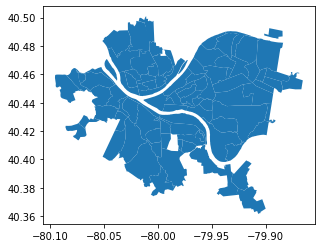

In [46]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [47]:
# do the merge
crime_map = neighborhoods.merge(num_of_crimes, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
# look at the head to confirm it merged correctly
crime_map[['hood','Num','geometry']].head()

,hood,Num,geometry
0,Central Oakland,34.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,45.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,17.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,45.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,28.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


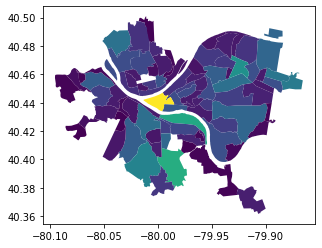

In [35]:
# draw a choropleth map using data from the column named "number_of_steps"
crime_map.plot(column='Num')

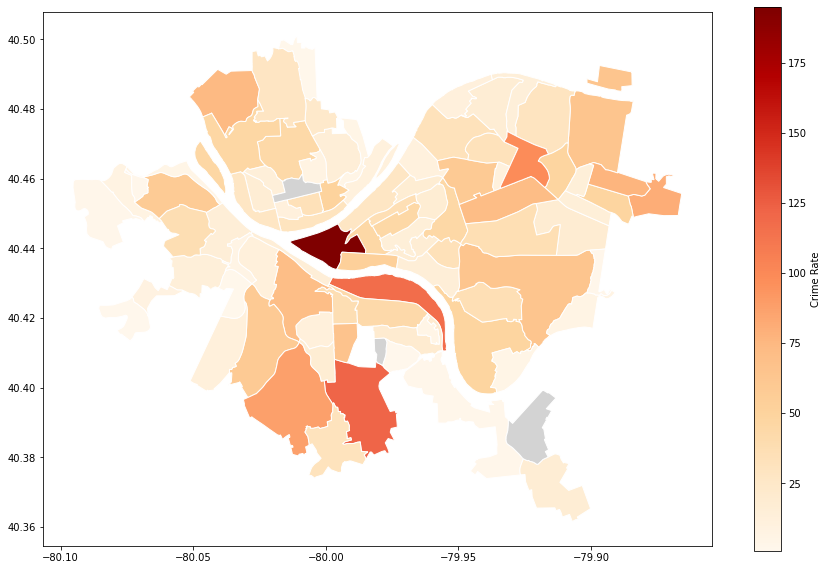

In [49]:
crime_map.plot(column='Num', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Crime Rate"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Incident Crime: highest rate in the business district
It was found that the central business district (which includes central oakland), has the highest rate of crime, followed by Carrick, Southside Flats, and East Liberty. Although the labeling of the neighborhoods has slight discrepancy between the shape file I used and the Neighborhood data from the police report, the findings on the shapefile match that of the geographic map using the policeblotter data neighborhood monikers. 
The safest neighborhood is tied between that of East Carnegie and St. Clair. 

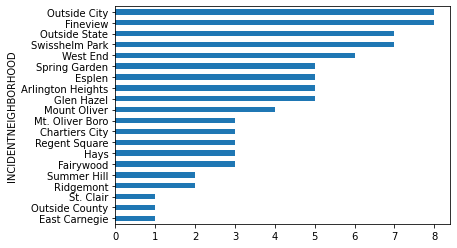

In [50]:
num_of_crimes = num_of_crimes.sort_values(ascending=True)
num_of_crimes.head(20).plot.barh(x='hood')


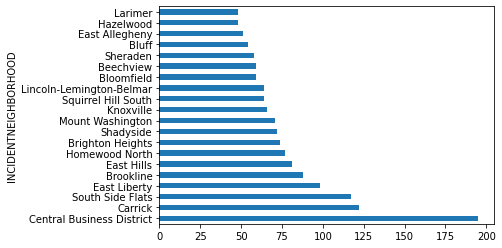

In [52]:
num_of_crimes = num_of_crimes.sort_values(ascending=False)
num_of_crimes.head(20).plot.barh(x='hood')